In [1]:
import endomill
from nbmetalog import nbmetalog as nbm


In [2]:
nbm.print_metadata()


context: ci
hostname: 423f04dfd632
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 2
nbname: reconstructed_phylogeny_evaluation_mill
nbpath: /opt/hereditary-stratigraph-concept/binder/phylogenetic-inference/reconstructed_phylogeny_evaluation_mill.ipynb
revision: null
session: 19ebdb99-20d3-4ab3-b81d-79cd9da36c5a
timestamp: 2022-12-14T01:05:35Z00:00


IPython==7.16.1
keyname==0.4.1
yaml==5.3.1
endomill==0.1.3
nbmetalog==0.2.6
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.3.0
json==2.0.9
ipykernel==5.5.3


In [3]:
prefix = (
    'https://github.com/mmore500/hereditary-stratigraph-concept/'
    'blob/49e2bb1ff4c433af5eab2532f077663dc7d9efa3/'
    'binder/phylogenetic-inference/'
)
reconstructed_phylogeny_urls = [
    prefix + 'a=reconstructed_phylogenies+source=nk_ecoeaselection_seed110_pop100_mut.01_snapshot_3000.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_randomselection_seed7_pop100_mut.01_snapshot_5000.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz',
    prefix + 'a=reconstructed_phylogenies+source=nk_tournamentselection_seed140_pop100_mut.01_snapshot_5000.csv.gz',
]

original_phylogeny_urls = [
            # nk_ecoeaselection_seed110_pop100_mut.01_snapshot_3000.csv
            'https://osf.io/5d3be/',
            # nk_lexicaseselection_seed110_pop165_mut.01_snapshot_500.csv
            'https://osf.io/8ycq7/',
            # nk_randomselection_seed7_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/ydxt7/',
            # nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/cz9fk/',
            # nk_tournamentselection_seed140_pop100_mut.01_snapshot_5000.csv
            'https://osf.io/5ubn8/',
]

endomill.instantiate_over(
    parameter_packs=[
        {
            'reconstructed_phylogeny_url': reconstructed_phylogeny_url,
            'original_phylogeny_url': original_phylogeny_url,
        }
        for reconstructed_phylogeny_url, original_phylogeny_url
        in zip(reconstructed_phylogeny_urls, original_phylogeny_urls)
    ],
)


detected executing.endomill.ipynb file
skipping instantiate_over


In [4]:
#define papermil parameters
reconstructed_phylogeny_url: str
original_phylogeny_url: str


In [5]:
# Parameters
reconstructed_phylogeny_url = "https://github.com/mmore500/hereditary-stratigraph-concept/blob/49e2bb1ff4c433af5eab2532f077663dc7d9efa3/binder/phylogenetic-inference/a=reconstructed_phylogenies+source=nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz"
original_phylogeny_url = "https://osf.io/cz9fk/"


In [6]:
import alifedata_phyloinformatics_convert as apc
from Bio import Phylo
import dendropy
from iterpop import iterpop as ip
from keyname import keyname as kn
from matplotlib import pyplot as plt
import numpy as np
import opytional as opyt
from os.path import basename
import pandas as pd
import seaborn as sns
import sys
from teeplot import teeplot as tp


In [7]:
from pylib import draw_biopython_tree_with_origin_time_bounds


In [8]:
sys.setrecursionlimit(100000) # data exceeds default recursion limit


In [9]:
nbm.print_metadata()


context: ci
hostname: 423f04dfd632
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 9
nbname: reconstructed_phylogeny_evaluation_mill
nbpath: /opt/hereditary-stratigraph-concept/binder/phylogenetic-inference/reconstructed_phylogeny_evaluation_mill.ipynb
revision: null
session: 19ebdb99-20d3-4ab3-b81d-79cd9da36c5a
timestamp: 2022-12-14T01:05:36Z00:00




IPython==7.16.1
endomill==0.1.3
ipykernel==5.5.3
ipython_genutils==0.2.0
json==2.0.9
keyname==0.4.1
logging==0.5.1.2
nbmetalog==0.2.6
re==2.2.1
yaml==5.3.1
zmq==22.3.0
Bio==1.79
alifedata_phyloinformatics_convert==0.6.0
dendropy==4.5.2
iterpop==0.4.0
matplotlib==3.3.2
numpy==1.21.5
opytional==0.1.0
pandas==1.1.2
seaborn==0.11.0
teeplot==0.2.0


In [10]:
original_df = pd.read_csv(
    f'{original_phylogeny_url}/download',
)

original_df['name'] = original_df['id'].astype(str)
original_df['taxon_label'] = original_df['id'].astype(str)

nbm.print_dataframe_synopsis(original_df)


digest: fb68c8a885089d035e1f8a06963103903c5e7568ce8dddb60320422f58a44959
manifest:
  ancestor_list: '    3241#  ex., [316428]'
  depth: '            3048#  ex., 3042'
  destruction_time: ' 2547#  ex., inf'
  id: '               3313#  ex., 316653'
  name: '             3313#  ex., 316653'
  num_offspring: '    6#     ex., 0'
  num_orgs: '         3#     ex., 1'
  origin_time: '      3057#  ex., 5000'
  phenotype: '        3297#  ex., [ 0.600023 0.795695 0.965585 0.391101 0.863194 0.982911
    0.43849 0.470596 0.690861 0.73147 0.936691 0.993888 0.891655 0.889409 0.120467
    0.918155 0.649416 0.985481 0.545775 0.298241 0.0437687 0.00350497 0.882206 0.411082
    0.641201 0.171095 0.713238 0.633266 0.28839 0.159282 0.854242 0.975637 0.947336
    0.949524 0.970265 0.26913 0.342512 0.973407 0.68399 0.507257 0.897186 0.263287
    0.611318 0.628408 0.961238 0.395228 0.281177 0.992705 0.577607 0.00370154 0.582243
    0.242543 0.0358797 0.847181 0.0894643 0.492351 0.713603 0.176921 0.459707 0.6

In [11]:
reconstructed_df = pd.read_csv(
    f'{reconstructed_phylogeny_url}?raw=true',
    compression='gzip',
)
reconstructed_df['taxon_label'] = reconstructed_df['name']
reconstructed_df['Instance'] = reconstructed_df.apply(
    lambda row: row['Treatment'] + row['Algorithm'],
    axis=1,
)

nbm.print_dataframe_synopsis(reconstructed_df)

data_filename = basename(reconstructed_phylogeny_url)

print(data_filename)


digest: 039981be97edbabe941a3aacfdee29195b62515b20935cb360e568ae44f59c5b
manifest:
  Algorithm: '                           1#     ex., <function upgma at 0x7fc2638d7dc0>'
  Instance: '                            18#    ex., differentia=1+policy=RecencyProportionalResolution+target=4096<function
    upgma at 0x7fc2638d7dc0>'
  Origin Time Estimate: '                61#    ex., 4944.0'
  Origin Time Lower Bound (Inclusive): ' 45#    ex., 4942'
  Origin Time Upper Bound (Exclusive): ' 33#    ex., 4947'
  Treatment: '                           18#    ex., differentia=1+policy=RecencyProportionalResolution+target=4096'
  'Unnamed: 0': '                          2610#  ex., 0'
  ancestor_list: '                       142#   ex., [None]'
  branch_length: '                       77#    ex., 4944.0'
  id: '                                  145#   ex., 0'
  index: '                               145#   ex., 0'
  name: '                                145#   ex., Inner72'
  origin_time: '       

In [12]:
endomill.add_instance_outpath(
    f'a=reconstructed_phylogeny_evaluation+source={kn.unpack(data_filename)["source"]}.endomill.ipynb',
)


In [13]:
def sort_tree(tree):
    # sort clades for consistent display
    for node in tree.find_clades(order='postorder'):
        if node.clades:
            node.max_descendant = max(child.max_descendant for child in node.clades)
        else:
            node.max_descendant = int(node.name)
        node.clades.sort(key=lambda node: node.max_descendant)


In [14]:
taxon_rename_dict = {
    str(taxon): np.base_repr(i, 36).lower()
    for i, taxon
    in enumerate(sorted(reconstructed_df['name'].unique()))
    if 'Inner' not in taxon
}


teeplots/a=true_phylogeny+source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+viz=truncate-phylo+ext=.pdf


teeplots/a=true_phylogeny+source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+viz=truncate-phylo+ext=.png


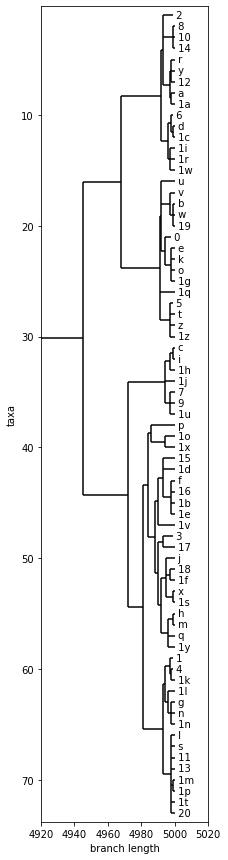

In [15]:
actual_tree = apc.alife_dataframe_to_biopython_tree(
    original_df,
    setup_branch_lengths=True,
)
for inner_node in actual_tree.get_nonterminals():
    inner_node.name = None
sort_tree(actual_tree)


def truncate_phylo(*args, **kwargs):
    Phylo.draw(*args, **kwargs)
    if 'sharingselection' in reconstructed_phylogeny_url:
        plt.gca().set_xlim(4920, 5020)
        plt.gcf().set_size_inches(3, 15)

tp.tee(
    truncate_phylo,
    actual_tree,
    label_func=lambda node: opyt.apply_if(node.name, lambda x: taxon_rename_dict[str(x)]),
    do_show=False,
    teeplot_outattrs={
        'a' : 'true_phylogeny',
        'source' : kn.demote(data_filename),
    },
)


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%1~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%64~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%RecencyProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%4096+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%512+viz=truncate-phylo-bounds+ext=.png


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.pdf


teeplots/source=a%reconstructed_phylogenies~source%nk_sharingselection_seed10_pop100_mut.01_snapshot_5000.csv.gz+treatment=differentia%8~policy%TaperedDepthProportionalResolution~target%64+viz=truncate-phylo-bounds+ext=.png


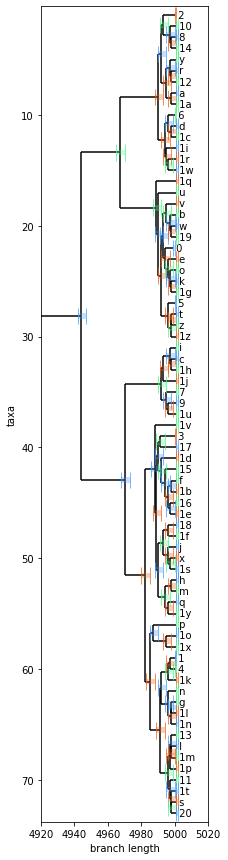

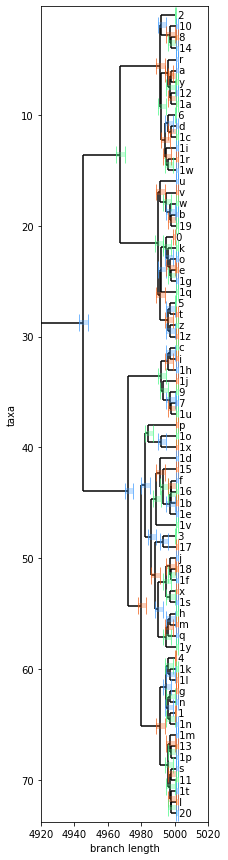

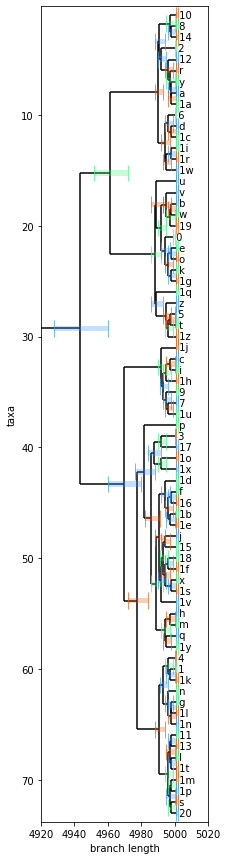

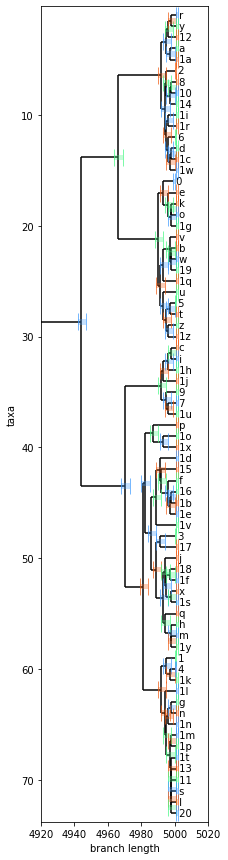

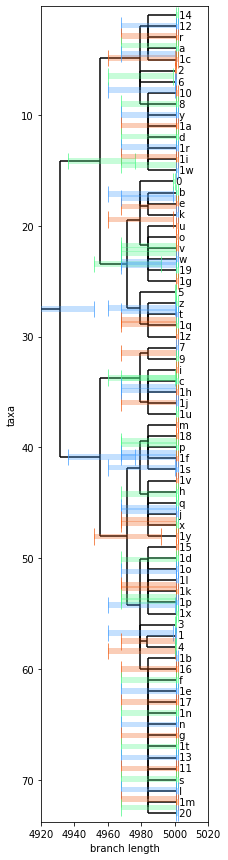

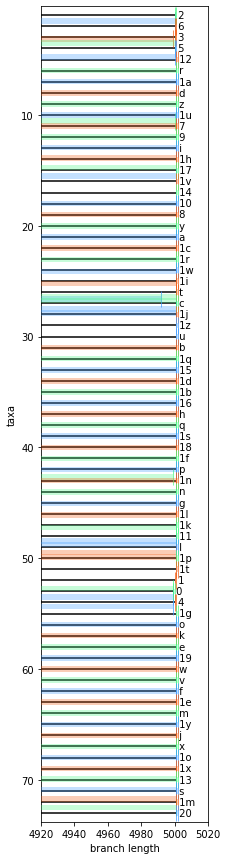

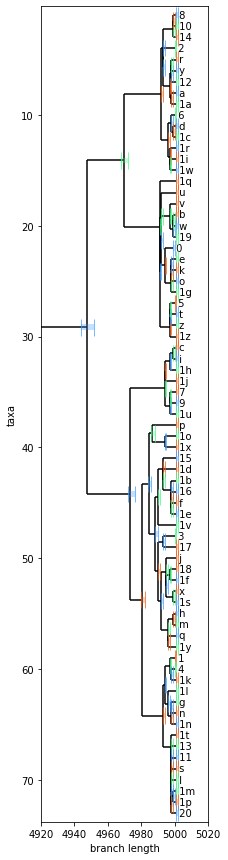

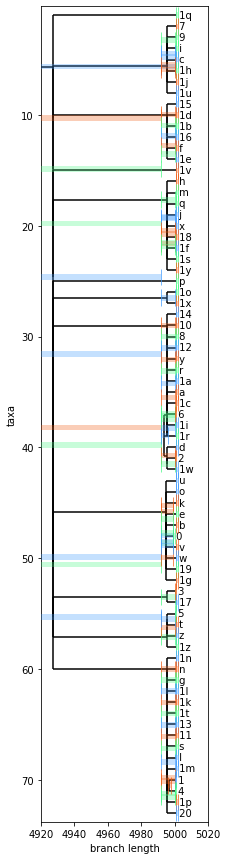

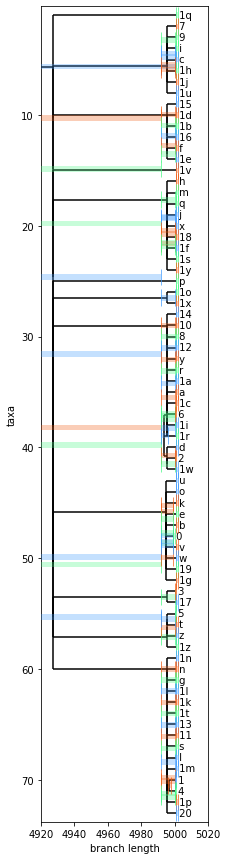

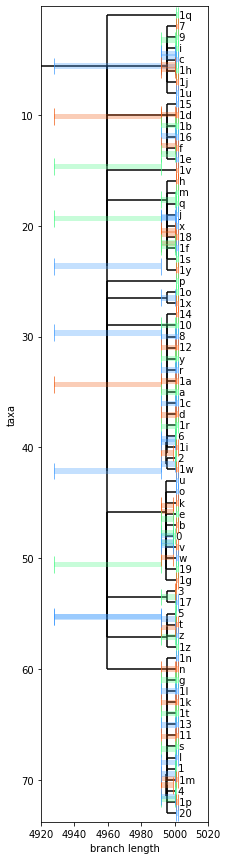

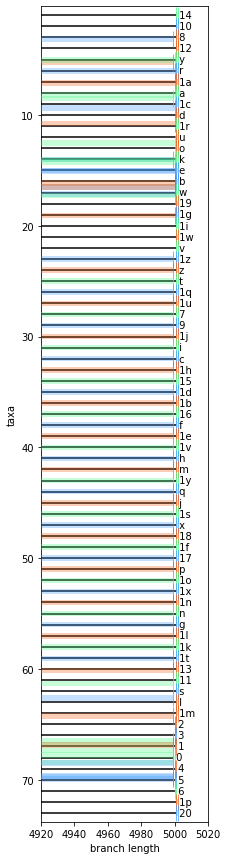

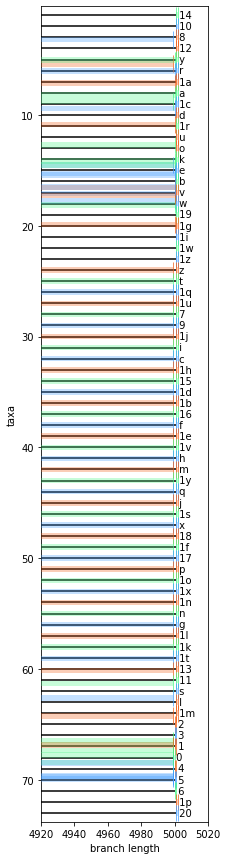

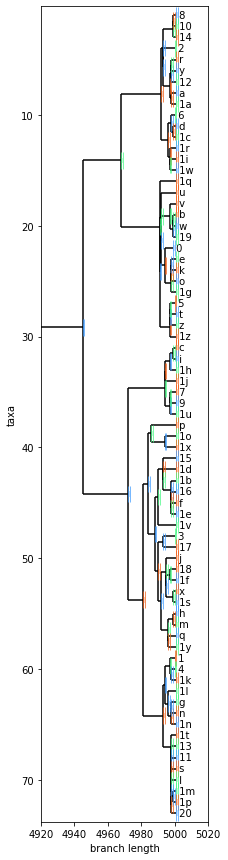

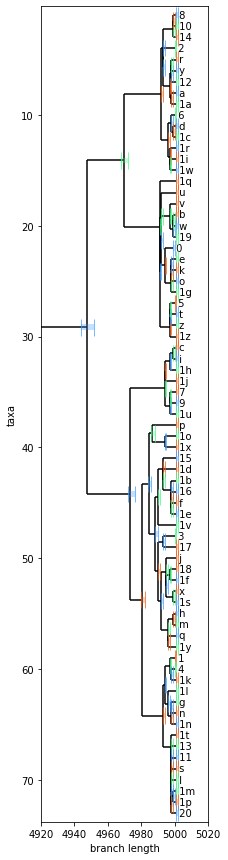

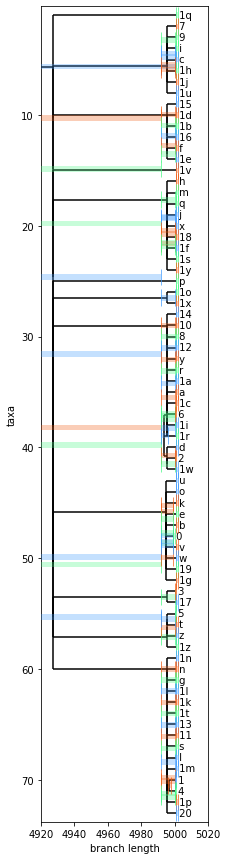

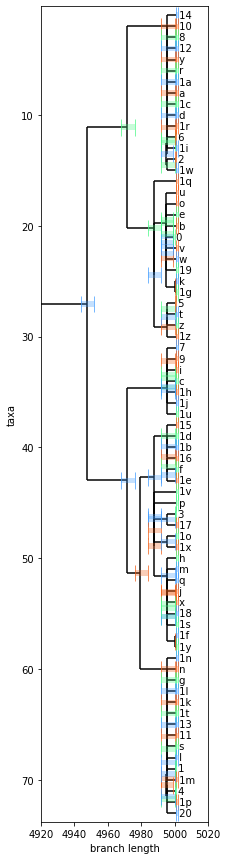

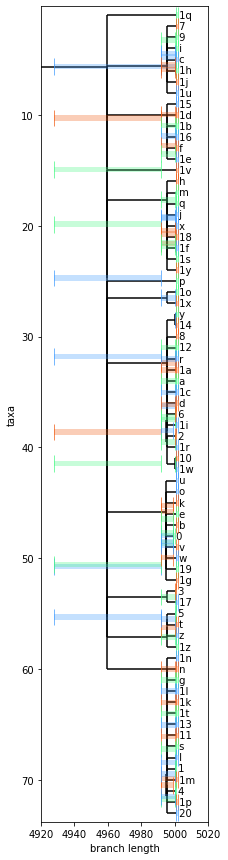

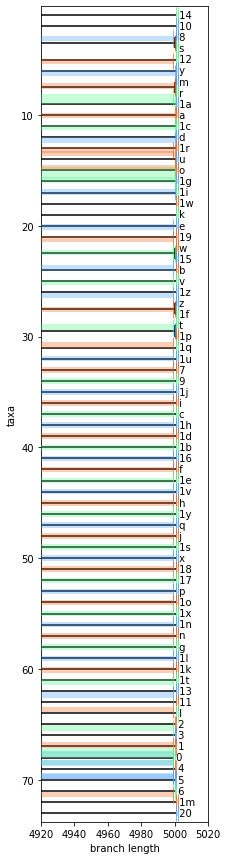

In [16]:
def truncate_phylo_bounds(*args, **kwargs):
    draw_biopython_tree_with_origin_time_bounds(*args, **kwargs)
    if 'sharingselection' in reconstructed_phylogeny_url:
        plt.gca().set_xlim(4920, 5020)
        plt.gcf().set_size_inches(3, 15)


for instance, group in reconstructed_df.groupby('Instance'):
    assert not any(group['branch_length'].isnull())
    tree = apc.alife_dataframe_to_biopython_tree(
        group,
        # don't need to pass setup_edge_lengths=True
        # because they're provided directly
        # as a column in the dataframe
        setattrs={
            'Origin Time Lower Bound (Inclusive)': 'origin_time_lb',
            'Origin Time Upper Bound (Exclusive)': 'origin_time_ub',
        },
    )
    sort_tree(tree)
    tp.tee(
        truncate_phylo_bounds,
        tree,
        label_func=lambda node: opyt.apply_if(
            node.name, lambda x: taxon_rename_dict[str(x)]
        )
        if "Inner" not in node.name
        else None,
        do_show=False,
        teeplot_outattrs={
            'treatment': kn.demote(ip.popsingleton(group['Treatment'].unique())),
            'source' : kn.demote(data_filename),
        },
    )


In [17]:
actual_tree = apc.alife_dataframe_to_dendropy_tree(original_df)
for inner_node in actual_tree.internal_nodes():
    inner_node.taxon = None

records = []
for instance, group in reconstructed_df.groupby('Instance'):
    group['edge_length'] = group['branch_length']
    assert not any(group['edge_length'].isnull())
    tree = apc.alife_dataframe_to_dendropy_tree(
        group,
        # don't need to pass setup_edge_lengths=True
        # because they're provided directly
        # as a column in the dataframe
    )
    tree.migrate_taxon_namespace(actual_tree.taxon_namespace)
    unweighted_robinson_foulds = dendropy.calculate.treecompare.unweighted_robinson_foulds_distance(
        actual_tree,
        tree,
    )
    weighted_robinson_foulds = dendropy.calculate.treecompare.weighted_robinson_foulds_distance(
        actual_tree,
        tree,
    )
    euclidean = dendropy.calculate.treecompare.euclidean_distance(
        actual_tree,
        tree,
    )

    records.append({
        **{
            'Instance': 'Instance',
            'Algorithm': ip.popsingleton(group['Algorithm'].unique()),
            'Treatment': ip.popsingleton(group['Treatment'].unique()),
            'Unweighted Robinson Foulds Distance Error': unweighted_robinson_foulds,
            'Weighted Robinson Foulds Distance Error': weighted_robinson_foulds,
            'Euclidean Distance Error': euclidean,
        },
        **kn.unpack(ip.popsingleton(group['Treatment'].unique())),
    })


res_df = pd.DataFrame.from_records(records)


In [18]:
res_df


,Instance,Algorithm,Treatment,Unweighted Robinson Foulds Distance Error,Weighted Robinson Foulds Distance Error,Euclidean Distance Error,differentia,policy,target,_
0,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=RecencyProportionalResolu...,40,5551.0,4944.661262,1,RecencyProportionalResolution,4096,differentia=1+policy=RecencyProportionalResolu...
1,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=RecencyProportionalResolu...,42,5553.0,4945.666487,1,RecencyProportionalResolution,512,differentia=1+policy=RecencyProportionalResolu...
2,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=RecencyProportionalResolu...,44,5578.0,4944.201806,1,RecencyProportionalResolution,64,differentia=1+policy=RecencyProportionalResolu...
3,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=TaperedDepthProportionalR...,38,5547.0,4944.670970,1,TaperedDepthProportionalResolution,4096,differentia=1+policy=TaperedDepthProportionalR...
4,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=TaperedDepthProportionalR...,100,6405.5,4934.158819,1,TaperedDepthProportionalResolution,512,differentia=1+policy=TaperedDepthProportionalR...
5,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=1+policy=TaperedDepthProportionalR...,116,12565.5,4911.348567,1,TaperedDepthProportionalResolution,64,differentia=1+policy=TaperedDepthProportionalR...
6,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=64+policy=RecencyProportionalResol...,24,5485.5,4948.097842,64,RecencyProportionalResolution,4096,differentia=64+policy=RecencyProportionalResol...
7,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=64+policy=RecencyProportionalResol...,90,6146.5,4933.569017,64,RecencyProportionalResolution,512,differentia=64+policy=RecencyProportionalResol...
8,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=64+policy=RecencyProportionalResol...,90,6146.5,4933.569017,64,RecencyProportionalResolution,64,differentia=64+policy=RecencyProportionalResol...
9,Instance,<function upgma at 0x7fc2638d7dc0>,differentia=64+policy=TaperedDepthProportional...,90,5792.5,4961.404212,64,TaperedDepthProportionalResolution,4096,differentia=64+policy=TaperedDepthProportional...


In [19]:
nbm.print_dataframe_synopsis(res_df)


digest: 5da045fe3d66ac2c7c52511162fc01756b71d409452bcad072bf3ffc741d42e0
manifest:
  Algorithm: '                                 1#   ex., <function upgma at 0x7fc2638d7dc0>'
  Euclidean Distance Error: '                  15#  ex., 4944.661262412219'
  Instance: '                                  1#   ex., Instance'
  Treatment: '                                 18#  ex., differentia=1+policy=RecencyProportionalResolution+target=4096'
  Unweighted Robinson Foulds Distance Error: ' 10#  ex., 40'
  Weighted Robinson Foulds Distance Error: '   15#  ex., 5551.0'
  _: '                                         18#  ex., differentia=1+policy=RecencyProportionalResolution+target=4096'
  differentia: '                               3#   ex., 1'
  policy: '                                    2#   ex., RecencyProportionalResolution'
  target: '                                    3#   ex., 4096'
num cols: 10
num cols all na: 0
num cols any na: 0
num na: 0
num rows: 18
num rows all na: 0
num rows 

In [20]:
res_df['Target Column Bit Size'] = res_df['target']
res_df['Stratum Retention Policy'] = res_df['policy']
res_df['Differentia Bit Width'] = res_df['differentia']


In [21]:
def facet_barplot(
    data,
    col,
    x,
    y,
    hue,
):
    g = sns.FacetGrid(
        data,
        col=col,
        col_order=sorted(data[col].unique(), key=lambda x: int(x)),
        margin_titles=True,
        legend_out=True,
    )
    g.map_dataframe(
        sns.barplot,
        x=x,
        y=y,
        hue=hue,
        order=sorted(data[x].unique(), key=lambda x: int(x)),
        palette='colorblind',
    )
    g.add_legend()
    g._legend.set_title(hue)
    for ax in g.axes.flat:
        ax.set_xlabel(x)
    g.axes.flat[0].set_ylabel(y)


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=euclidean-distance-error+ext=.pdf


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=euclidean-distance-error+ext=.png


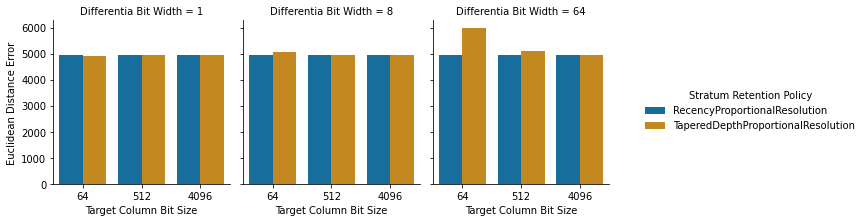

In [22]:
tp.tee(
    facet_barplot,
    data=res_df,
    col='Differentia Bit Width',
    x='Target Column Bit Size',
    y='Euclidean Distance Error',
    hue='Stratum Retention Policy',
)


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=unweighted-robinson-foulds-distance-error+ext=.pdf


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=unweighted-robinson-foulds-distance-error+ext=.png


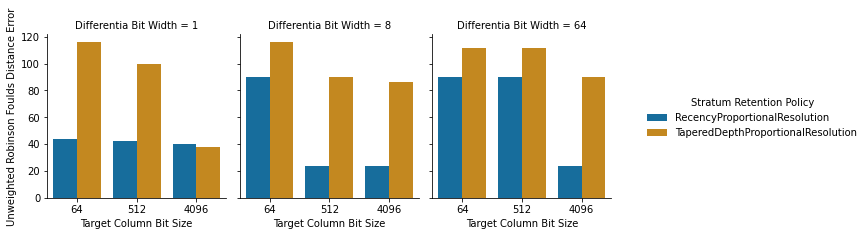

In [23]:
tp.tee(
    facet_barplot,
    data=res_df,
    col='Differentia Bit Width',
    x='Target Column Bit Size',
    y='Unweighted Robinson Foulds Distance Error',
    hue='Stratum Retention Policy',
)


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=weighted-robinson-foulds-distance-error+ext=.pdf


teeplots/col=differentia-bit-width+hue=stratum-retention-policy+viz=facet-barplot+x=target-column-bit-size+y=weighted-robinson-foulds-distance-error+ext=.png


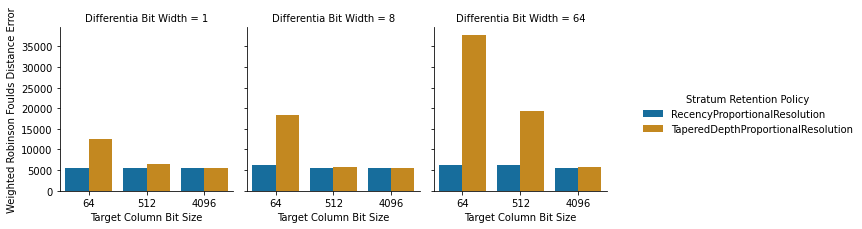

In [24]:
tp.tee(
    facet_barplot,
    data=res_df,
    col='Differentia Bit Width',
    x='Target Column Bit Size',
    y='Weighted Robinson Foulds Distance Error',
    hue='Stratum Retention Policy',
)


In [25]:
res_df.to_csv(
    f'a=reconstructed_phylogeny_evaluation+source={kn.unpack(data_filename)["source"]}',
    compression='gzip',
)
res_df.to_csv(
    f'a=reconstructed_phylogeny_evaluation+source={kn.unpack(data_filename)["source"][:-len(".gz")]}',
)
